# Error bars & Error region

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Error bars

* 基本的誤差圖，就是給他 y 的 誤差 dy，他會幫你畫出 y+dy 到 y-dy 的圖
* 首先來做一下資料： y = sin(x) + unif(0.8,-0.8)  
* 所以，y的誤差範圍在 +- 0.8 之間

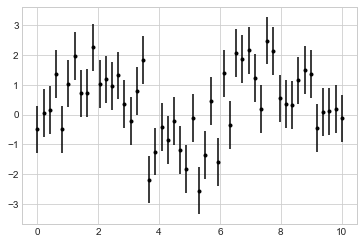

In [10]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

* 這邊要注意的是 `fmt` 這個參數，是用來控制 "線條" 和 "點" 的外觀，那 `.k' 這個簡寫的 . 就是 dash dot，k是black

* 如果每個x的 errorbar 的長度不同，也沒關係，就是 dy 變成用 array 放入就好：

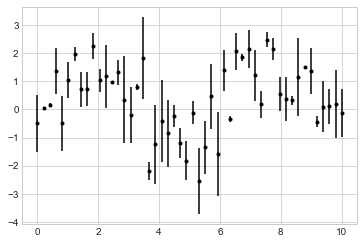

In [11]:
dy2 = 0.8 * np.random.randn(50) # 這樣 dy 就有 50 個值，對應到每個x的誤差範圍
plt.errorbar(x, y, yerr=dy2, fmt='.k');

* 我們還可以客製化圖形的點和 error bar，例如我想讓 error bar 的顏色變 lightgray, 寬度變粗等等

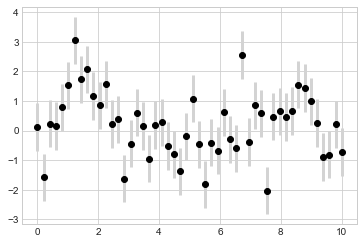

In [4]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

* 還有頗多沒講到的，之後看 `plt.errorbar?` 自己整理：  
  * horizontal errorbars (`xerr`). 
  * 單邊誤差(one-sided errorbars)

## Error Region

* 我們知道，做預測模型時，每個 x 所對應到的預測誤差不會一樣 (x附近有越多training data的，預測誤差較小，x附近幾乎沒 training data的，預測誤差較大)
* 那這邊舉個最極端的例子，Gaussian Process Regression 的時候，x是連續型，在上面的連續點上，都有不同的誤差
* 那如果我把幾乎無限多個連續的點所對應的error bar 給畫出來，就很醜，這時候，我想畫的其實是 error region
* 以下，很快的 做出一份假資料， fit GP後，畫出預測值與預測誤差：

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor as GP

# true model 其實就是 y = sin(x)，我生出5筆資料
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 用 gp 來 fit，看能不能 fit 出像 y = sin(x) 的函數
gp = GP()
gp.fit(xdata[:, np.newaxis], ydata)

# 拿 fit 好的 model 來做預測。x給 0~100 間等距的 1000個點，我希望預測出來的 1000 個值，很像 y = sin(x)
xfit = np.linspace(0, 10, 1000)
yfit, y_std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(y_std)  # 2*sigma ~ 95% confidence region

* 我們現在有了 `xfit`, `yfit`, 和 `dyfit`  
* 我們還是可以用剛剛的方式(`plt.errorbar`)，畫出 1000 個 error bar  
* 但我不想這樣，因為很醜，我想用 `plt.fill_between` 的方式，把誤差區域填滿顏色就好. 

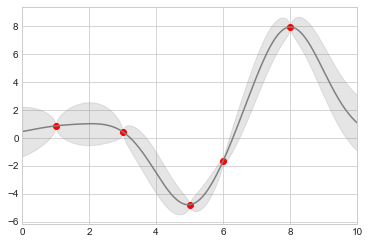

In [13]:
# Visualize the result
plt.plot(xdata, ydata, 'or') # 資料的真值，點的形式是 o，顏色是 r = red
plt.plot(xfit, yfit, '-', color='gray') # fit出來的值，用 line 來畫，顏色是 gray

plt.fill_between(xfit, 
                 yfit - dyfit, # 上界
                 yfit + dyfit, # 下界
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

* 這張圖蠻明顯的說明了 GP 的特性：越靠近training data (紅點)的地方，預測誤差越小，離越遠，預測誤差越大。